In [35]:
import pandas as pd
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder



In [36]:
label_encoder = LabelEncoder()


In [37]:
centers=pd.read_csv('DATA/fulfilment_center_info.csv')
meals=pd.read_csv('DATA/meal_info.csv')
df=pd.read_csv('DATA/train.csv')

In [38]:
df=df.merge(centers,on='center_id', sort=False)
df=df.merge(meals,on='meal_id', sort=False)
df = df.sort_values(by=['week'])

In [39]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
213354,1129793,1,93,1971,261.96,289.06,1,0,528,461,34,TYPE_A,3.9,Sandwich,Italian
52285,1160002,1,83,1248,152.29,240.62,0,0,107,659,77,TYPE_A,5.3,Beverages,Indian
58666,1132348,1,67,1248,251.23,253.23,0,0,26,638,56,TYPE_B,7.0,Beverages,Indian
226680,1420300,1,17,1902,387.03,446.23,0,0,55,517,56,TYPE_A,3.2,Biryani,Indian
256134,1347563,1,139,2581,584.91,613.07,1,1,149,693,34,TYPE_C,2.8,Pizza,Continental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1275021,145,24,1885,159.11,159.11,0,0,1890,614,85,TYPE_B,3.6,Beverages,Thai
357960,1298794,145,83,1247,447.23,445.23,0,0,28,659,77,TYPE_A,5.3,Biryani,Indian
456434,1434028,145,68,2104,582.03,581.03,0,0,40,676,34,TYPE_B,4.1,Fish,Continental
247974,1437014,145,59,1558,563.60,563.60,0,0,67,456,56,TYPE_A,4.2,Pizza,Continental


In [40]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [41]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456548 entries, 213354 to 247830
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [44]:
df.drop('id',axis=1,inplace=True)

In [45]:
df['checkout_price']=df['checkout_price'].astype(int)

In [46]:
df['base_price']=df['base_price'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456548 entries, 213354 to 247830
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  int64  
 4   base_price             456548 non-null  int64  
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   city_code              456548 non-null  int64  
 9   region_code            456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
dtypes: float64(1), int64(10), object(3)


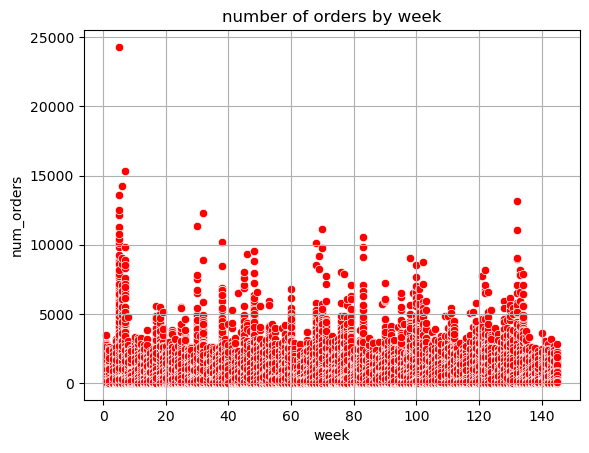

In [48]:
sns.scatterplot(x=df['week'], y=df['num_orders'], color='r')
plt.grid(True)
plt.title('number of orders by week')
plt.show()

#### from scatter plot we can consider the above 5000 number of orders become outliers

In [49]:
label_encoder = LabelEncoder()


In [50]:
df["center_type"] = label_encoder.fit_transform(df["center_type"])
df["category"] = label_encoder.fit_transform(df["category"])
df["cuisine"] = label_encoder.fit_transform(df["cuisine"])


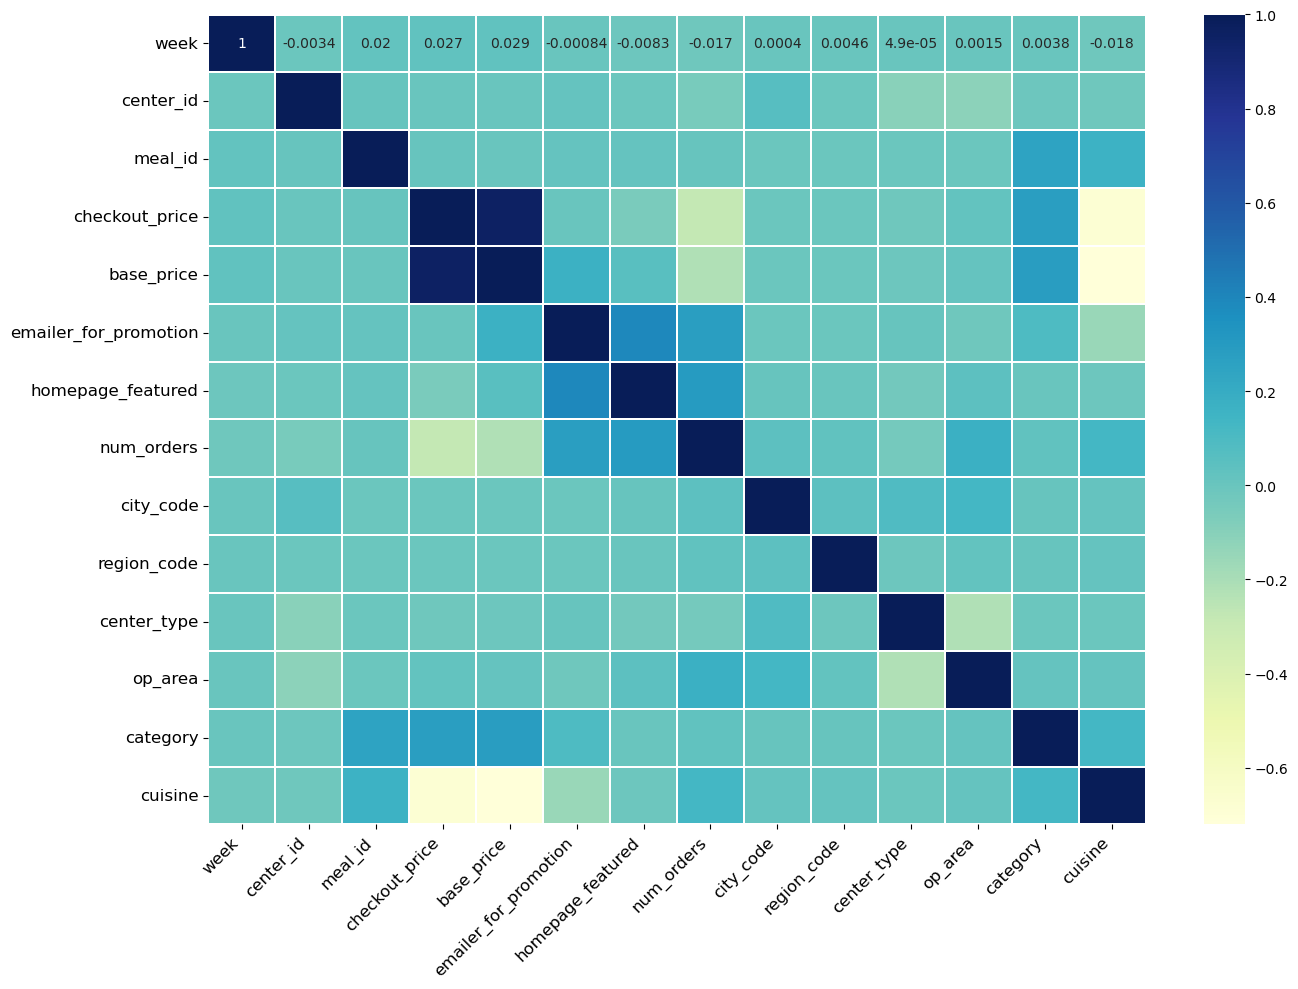

In [51]:
plt.figure(figsize = (14, 10))

# Plot labels
sns.heatmap(df.corr(),linewidths=0.1, cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [34]:
### checkoutprice ,base_price , email_promotion,homepage promotion,op_area,cuisin have high correlation with target column.